### 设置显示宽度比例

In [1]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:80% !important; }</style>"))

### 导入模块及设置GPU内存占用

In [2]:
import tensorflow as tf

print(tf.__version__)

import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0,1"
# 获取物理gpu,cpu对象
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
cpus = tf.config.experimental.list_physical_devices(device_type='CPU')
print(gpus, cpus)
# 设置当前程序的 物理可见设备范围
tf.config.experimental.set_visible_devices(devices=gpus[0], device_type='GPU')

#设置仅在需要时申请：
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)

# 下面的方式是设置Tensorflow固定消耗GPU:0的2GB显存
tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024),tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024),tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024),tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)]
)

logical_gpus = tf.config.experimental.list_logical_devices('GPU')

print('物理gpu个数: ', len(gpus))
print('总的gpu个数，其中包括括虚拟Logical gpus: ', len(logical_gpus))

2.0.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')] [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
物理gpu个数:  2
总的gpu个数，其中包括括虚拟Logical gpus:  4


In [3]:
from tensorflow import keras
import numpy
import time
import sys
import matplotlib.pyplot as plt

### 导入数据

In [4]:
from tensorflow.keras.datasets   import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('样本量大小:',len(x_train), len(x_test))
print(x_train.shape)
# x_train[0]

样本量大小: 60000 10000
(60000, 28, 28)


### 查看及展示数据

In [5]:
# 数字对应各种类别
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]
lable = get_fashion_mnist_labels(y_test[0:10])
print(lable)

['ankle boot', 'pullover', 'trouser', 'trouser', 'shirt', 'trouser', 'coat', 'shirt', 'sandal', 'sneaker']


In [6]:
def show_fashion_mnist(images, labels):
    _, figs = plt.subplots(1, len(images), figsize=(56, 56))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.reshape((28, 28)))
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

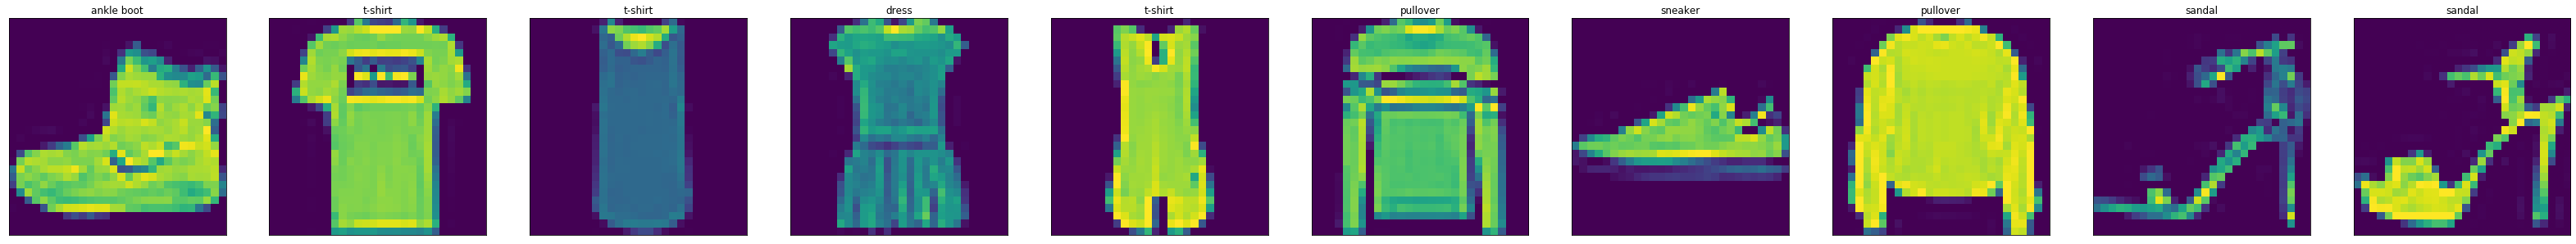

In [7]:
X, y = [], []
for i in range(10):
    X.append(x_train[i])
    y.append(y_train[i])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [8]:
# 读取小批量数据
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
# 除以255使得所有像素的数值均在0到1之间, y不变。
def data_scale(x, y):
    x = tf.cast(x, tf.float32)
    x = x / 255
    return x, y

# cache()启用缓存机制
train_iter = tf.data.Dataset.from_tensor_slices((x_train, y_train)).map(data_scale).cache().batch(256)

start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))

1.66 sec
